## Бэггинг и случайный лес

In [432]:
zeros = np.array(optimizer_l1.best_estimator_.coef_[:,:13])
features = np.where(zeros==0)[1]
print (features)
write_answer_6(features)


[0 1 5 6 7]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
digits = datasets.load_digits()

In [8]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
def write_answer(cv_score, task_number):
    with open("trees_answer{}.txt".format(task_number), "w") as fout:
        fout.write(str(cv_score))
        
def write_CV(estimator, task_num):
    np.random.seed(0)
    CV_score = cross_val_score(estimator, digits.data, digits.target, cv=10)
    write_answer(CV_score.mean(), task_num)

In [32]:
DTC = DecisionTreeClassifier()
write_CV(DTC, 1)

In [17]:
from sklearn.ensemble import BaggingClassifier

In [34]:
BC = BaggingClassifier(n_estimators=100)
write_CV(BC, 2)

In [33]:
BC = BaggingClassifier(n_estimators=100, max_features=np.sqrt(len(digits.data[0])).astype(int))
write_CV(BC, 3)

In [35]:
BC = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'), n_estimators=100)
write_CV(BC, 4)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
np.random.seed(0)
trees = np.arange(5, 100, 5)
cvs = []

for trees_num in trees:
    RF = RandomForestClassifier(n_estimators=trees_num)
    cvs.append(cross_val_score(RF, digits.data, digits.target, cv=5).mean())

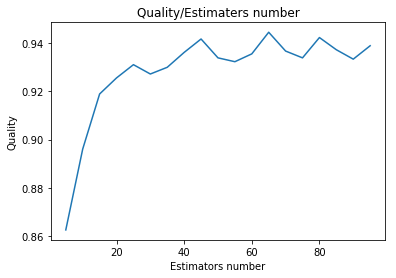

In [57]:
plt.plot(trees, cvs)
plt.title('Quality/Estimaters number')
plt.xlabel('Estimators number')
plt.ylabel('Quality')
plt.show()

In [58]:
np.random.seed(0)
feat_nums = np.linspace(0.1, 1, 100)
cvs_feat = []

for feat_num in feat_nums:
    RF = RandomForestClassifier(max_features=feat_num)
    cvs_feat.append(cross_val_score(RF, digits.data, digits.target, cv=5).mean())

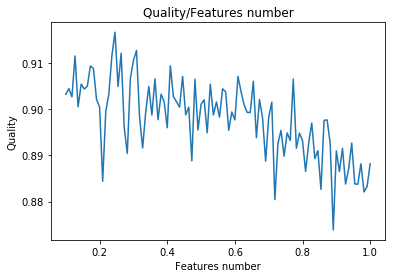

In [59]:
plt.plot(feat_nums, cvs_feat)
plt.title('Quality/Features number')
plt.xlabel('Features number')
plt.ylabel('Quality')
plt.show()

In [60]:
np.random.seed(0)
depths = np.arange(5, 100, 5)
cvs_depth = []

for depth in depths:
    RF = RandomForestClassifier(max_depth=depth)
    cvs_depth.append(cross_val_score(RF, digits.data, digits.target, cv=5).mean())

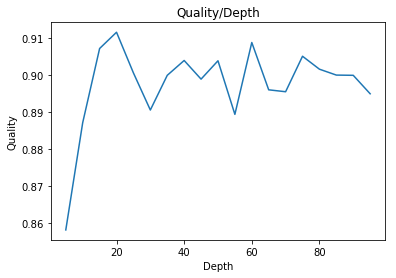

In [61]:
plt.plot(depths, cvs_depth)
plt.title('Quality/Depth')
plt.xlabel('Depth')
plt.ylabel('Quality')
plt.show()